In [1]:
from functions import *
from bayes_opt import BayesianOptimization

In [2]:
n=8
T=0.1
t_max=10
interpolator_kind='cubic'

In [3]:
def loss_ra(x1,x2,x3):
    '''
    Computes the negative average delta for multiple random Ising models 
    using for a given ramp-up schedule and maximum time.
    '''
    n_random_models = 1

    ramp_up_schedule = [x1,x2,x3]

    schedule = get_symmetric_schedule(ramp_up_schedule) # mirror and append the ramp up schedule
    schedule_interpolator = get_schedule_interpolator(schedule, kind=interpolator_kind) # get an interpolating function for the continuos schedule
    
    delta_sum = 0    
    for seed in range(n_random_models):
        m = RandomIsingModel(n=n, seed=seed)
        proposal_mat_ra = get_proposal_mat_ra(m, schedule_interpolator, t_max, assert_symmetry=False)
        P = get_transition_matrix(m, T, proposal_mat_ra)
        delta_sum += get_delta(P)
    
    delta_avg = delta_sum / n_random_models
    return delta_avg

In [4]:
pbounds = {'x1': (0,4), 'x2': (0,4), 'x3': (0,4)}

optimizer = BayesianOptimization(
    f=loss_ra,
    pbounds=pbounds,
    random_state=1,
)

In [5]:
optimizer.maximize(
    init_points=10,
    n_iter=1000,
)

|   iter    |  target   |    x1     |    x2     |    x3     |
-------------------------------------------------------------


| 1         | 0.008536  | 1.668     | 2.881     | 0.0004575 |


| 2         | 0.001238  | 1.209     | 0.587     | 0.3694    |


| 3         | 0.00741   | 0.745     | 1.382     | 1.587     |


| 4         | 0.001773  | 2.155     | 1.677     | 2.741     |


| 5         | 0.0008026 | 0.8178    | 3.512     | 0.1096    |


| 6         | 0.02444   | 2.682     | 1.669     | 2.235     |


| 7         | 0.001644  | 0.5615    | 0.7924    | 3.203     |


| 8         | 0.01284   | 3.873     | 1.254     | 2.769     |


| 9         | 0.003281  | 3.506     | 3.578     | 0.3402    |


| 10        | 0.00303   | 0.1562    | 0.6793    | 3.513     |


| 11        | 0.02463   | 2.779     | 1.665     | 2.152     |


| 12        | 0.01025   | 2.975     | 1.36      | 2.394     |


| 13        | 0.000267  | 2.599     | 1.864     | 1.999     |


| 14        | 0.0004744 | 0.9101    | 0.6224    | 3.789     |


| 15        | 0.01455   | 2.905     | 2.914     | 0.7788    |


| 16        | 0.004178  | 2.889     | 1.713     | 2.257     |


| 17        | 0.01938   | 3.822     | 2.656     | 1.883     |


| 18        | 0.006807  | 1.955     | 3.365     | 3.916     |


| 19        | 0.005139  | 2.688     | 1.593     | 2.132     |


| 20        | 0.0217    | 3.42      | 2.877     | 3.648     |


| 21        | 0.004085  | 2.708     | 2.192     | 1.533     |


| 22        | 0.002103  | 0.563     | 0.5575    | 1.267     |


| 23        | 0.002104  | 1.096     | 3.057     | 0.2675    |


| 24        | 0.02842   | 2.724     | 1.614     | 2.298     |


| 25        | 0.00295   | 2.393     | 0.4508    | 0.4671    |


| 26        | 0.002467  | 2.454     | 2.23      | 2.614     |


| 27        | 0.025     | 2.723     | 1.61      | 2.231     |


| 28        | 0.0235    | 2.625     | 1.603     | 2.412     |


| 29        | 0.01969   | 2.764     | 1.681     | 2.241     |


| 30        | 0.01956   | 2.572     | 1.691     | 2.31      |


| 31        | 0.02023   | 2.705     | 1.641     | 2.442     |


| 32        | 0.002567  | 0.9202    | 0.2591    | 2.815     |


| 33        | 0.01062   | 3.422     | 2.992     | 3.622     |


| 34        | 0.009868  | 2.707     | 1.707     | 2.33      |


| 35        | 0.01042   | 3.357     | 1.674     | 1.184     |


| 36        | 0.02305   | 2.647     | 1.629     | 2.358     |


| 37        | 0.02817   | 2.789     | 1.563     | 2.39      |


| 38        | 0.001767  | 0.172     | 1.659     | 0.02117   |


| 39        | 0.02196   | 2.899     | 1.537     | 2.453     |


| 40        | 0.006751  | 2.78      | 1.503     | 2.25      |


| 41        | 0.02408   | 2.838     | 1.608     | 2.553     |


| 42        | 0.0006796 | 0.4128    | 0.2286    | 1.479     |


| 43        | 0.01608   | 1.748     | 0.7739    | 0.3031    |


| 44        | 0.01691   | 2.784     | 1.703     | 2.153     |


| 45        | 0.02219   | 2.777     | 1.541     | 2.479     |


| 46        | 0.01227   | 2.766     | 1.49      | 2.392     |


| 47        | 0.02298   | 2.78      | 1.622     | 2.469     |


| 48        | 0.01686   | 2.574     | 1.59      | 2.317     |


| 49        | 0.02266   | 2.897     | 1.622     | 2.367     |


| 50        | 0.001903  | 1.019     | 3.382     | 0.5226    |


| 51        | 0.0004804 | 3.019     | 0.9455    | 3.501     |


| 52        | 0.01197   | 2.985     | 1.623     | 2.473     |


| 53        | 0.04045   | 3.243     | 2.989     | 3.558     |


| 54        | 0.02362   | 2.905     | 1.545     | 2.427     |


| 55        | 0.007863  | 3.221     | 3.048     | 3.62      |


| 56        | 0.0183    | 3.224     | 2.948     | 3.533     |


| 57        | 0.02068   | 2.672     | 1.637     | 2.372     |


| 58        | 0.02084   | 3.445     | 2.856     | 3.611     |


| 59        | 0.02691   | 3.263     | 2.955     | 3.572     |


| 60        | 0.02242   | 2.762     | 1.617     | 2.375     |


| 61        | 0.02968   | 2.877     | 1.556     | 2.363     |


| 62        | 0.001384  | 0.1688    | 2.631     | 3.965     |


| 63        | 0.03068   | 3.292     | 2.978     | 3.49      |


| 64        | 0.0043    | 0.4346    | 3.262     | 3.899     |


| 65        | 0.01769   | 3.487     | 0.7144    | 1.675     |


| 66        | 0.006289  | 0.2876    | 0.6244    | 2.71      |


| 67        | 0.01167   | 3.268     | 3.068     | 3.423     |


| 68        | 0.03596   | 3.254     | 2.998     | 3.57      |


| 69        | 0.03148   | 2.826     | 1.584     | 2.309     |


| 70        | 0.0004655 | 1.029     | 2.966     | 2.644     |


| 71        | 0.02123   | 2.561     | 1.683     | 2.295     |


| 72        | 0.01208   | 0.345     | 2.189     | 0.5801    |


| 73        | 0.02463   | 2.841     | 1.54      | 2.437     |


| 74        | 0.01648   | 3.372     | 2.913     | 3.442     |


| 75        | 0.03869   | 3.178     | 3.008     | 3.53      |


| 76        | 0.02276   | 2.85      | 1.599     | 2.435     |


| 77        | 0.02293   | 3.22      | 2.989     | 3.461     |


| 78        | 0.01572   | 2.718     | 1.566     | 2.547     |


| 79        | 0.04053   | 3.148     | 3.023     | 3.521     |


| 80        | 0.005494  | 3.246     | 3.077     | 3.5       |


| 81        | 0.009717  | 1.833     | 3.877     | 2.276     |


| 82        | 0.02738   | 2.875     | 1.546     | 2.651     |


| 83        | 0.001361  | 0.5379    | 3.755     | 0.03788   |


| 84        | 0.02734   | 2.873     | 1.517     | 2.733     |


| 85        | 0.005672  | 0.7071    | 0.8369    | 2.122     |


| 86        | 0.0001775 | 3.302     | 0.4796    | 2.233     |


| 87        | 0.01881   | 2.951     | 1.581     | 2.662     |


| 88        | 0.01902   | 2.046     | 2.843     | 3.732     |


| 89        | 0.02027   | 2.811     | 1.539     | 2.659     |


| 90        | 0.007952  | 3.324     | 3.361     | 2.15      |


| 91        | 0.04005   | 3.285     | 2.983     | 3.545     |


| 92        | 0.0009334 | 3.17      | 0.5636    | 3.169     |


| 93        | 0.01712   | 2.913     | 1.486     | 2.687     |


| 94        | 0.001217  | 1.56      | 0.1412    | 0.6194    |


| 95        | 0.005702  | 0.1017    | 0.1445    | 0.1193    |


| 96        | 0.03697   | 2.917     | 1.528     | 2.31      |


| 97        | 0.008713  | 3.093     | 3.094     | 3.545     |


| 98        | 0.01892   | 3.121     | 2.987     | 3.507     |


| 99        | 0.04033   | 3.14      | 3.013     | 3.553     |


| 100       | 0.02226   | 2.84      | 1.602     | 2.145     |


| 101       | 0.03079   | 2.918     | 1.601     | 2.262     |


| 102       | 0.03941   | 2.979     | 1.519     | 2.305     |


| 103       | 0.0004169 | 2.556     | 0.3966    | 0.574     |


| 104       | 0.03095   | 2.989     | 1.597     | 2.209     |


| 105       | 0.03562   | 3.041     | 1.561     | 2.245     |


| 106       | 0.008885  | 1.594     | 2.624     | 1.137     |


| 107       | 0.0164    | 2.964     | 1.442     | 2.187     |


| 108       | 0.03653   | 2.955     | 1.553     | 2.258     |


| 109       | 0.02666   | 3.049     | 1.607     | 2.179     |


| 110       | 0.005093  | 1.18      | 0.03402   | 0.623     |


| 111       | 0.008148  | 3.601     | 3.26      | 2.676     |


| 112       | 0.02867   | 2.724     | 1.61      | 2.306     |


| 113       | 0.01724   | 3.019     | 1.619     | 2.324     |


| 114       | 0.008269  | 2.87      | 1.623     | 2.669     |


| 115       | 0.003321  | 2.754     | 2.324     | 1.627     |


| 116       | 0.03879   | 3.114     | 1.455     | 2.339     |


| 117       | 0.02443   | 3.099     | 1.505     | 2.185     |


| 118       | 0.03147   | 3.239     | 1.537     | 2.256     |


| 119       | 0.01374   | 2.581     | 0.8183    | 2.634     |


| 120       | 0.00556   | 3.181     | 1.354     | 2.353     |


| 121       | 0.002277  | 0.7045    | 0.7826    | 0.5532    |


| 122       | 0.005557  | 3.617     | 0.2148    | 0.5355    |


| 123       | 0.02083   | 3.21      | 1.563     | 2.315     |


| 124       | 0.01593   | 3.211     | 1.441     | 2.234     |


| 125       | 0.0385    | 3.192     | 1.46      | 2.346     |


| 126       | 0.0314    | 3.083     | 1.559     | 2.328     |


| 127       | 0.01206   | 2.268     | 1.203     | 1.768     |


| 128       | 0.02919   | 3.153     | 1.57      | 2.219     |


| 129       | 0.03882   | 3.141     | 1.451     | 2.377     |


| 130       | 0.02788   | 3.122     | 1.506     | 2.422     |


| 131       | 0.01722   | 3.33      | 1.555     | 2.256     |


| 132       | 0.01397   | 3.012     | 1.49      | 2.233     |


| 133       | 0.03485   | 3.087     | 1.471     | 2.39      |


| 134       | 0.002664  | 0.1619    | 2.131     | 1.756     |


| 135       | 0.03028   | 2.956     | 1.581     | 2.321     |


| 136       | 0.01266   | 2.824     | 1.444     | 2.787     |


| 137       | 0.01314   | 3.115     | 2.218     | 3.393     |


| 138       | 0.02477   | 2.927     | 1.545     | 2.208     |


| 139       | 0.02838   | 3.211     | 1.503     | 2.454     |


| 140       | 0.03198   | 3.235     | 1.543     | 2.144     |


| 141       | 0.003138  | 1.627     | 2.936     | 0.4179    |


| 142       | 0.03697   | 3.117     | 1.512     | 2.32      |


| 143       | 0.006373  | 3.218     | 1.666     | 2.092     |


| 144       | 0.02009   | 3.047     | 1.452     | 2.329     |


| 145       | 0.003162  | 1.638     | 3.39      | 2.137     |


| 146       | 0.02908   | 3.391     | 1.434     | 2.471     |


| 147       | 0.0006361 | 2.116     | 0.566     | 3.717     |


| 148       | 0.02678   | 3.478     | 1.416     | 2.51      |


| 149       | 0.01169   | 2.334     | 2.153     | 0.8433    |


| 150       | 0.03304   | 3.282     | 1.456     | 2.406     |


| 151       | 0.01831   | 3.323     | 1.511     | 2.463     |


| 152       | 0.004523  | 3.603     | 1.483     | 2.477     |


| 153       | 0.002539  | 3.362     | 1.276     | 2.5       |


| 154       | 0.01431   | 3.189     | 1.429     | 2.569     |


| 155       | 0.001323  | 2.304     | 3.328     | 3.397     |


| 156       | 0.03899   | 3.33      | 1.411     | 2.351     |


| 157       | 0.009176  | 3.757     | 0.7062    | 0.9495    |


| 158       | 0.01006   | 1.833     | 3.284     | 1.195     |


| 159       | 0.03437   | 3.393     | 1.411     | 2.395     |


| 160       | 0.03392   | 3.515     | 1.36      | 2.368     |


| 161       | 0.02482   | 3.491     | 1.472     | 2.339     |


| 162       | 0.0009905 | 3.498     | 1.226     | 2.295     |


| 163       | 0.04      | 3.493     | 1.423     | 2.398     |


| 164       | 0.03039   | 3.381     | 1.476     | 2.4       |


| 165       | 0.001905  | 3.359     | 1.342     | 2.313     |


| 166       | 0.03701   | 3.594     | 1.42      | 2.316     |


| 167       | 0.01616   | 3.276     | 1.488     | 2.082     |


| 168       | 0.02523   | 3.654     | 1.321     | 2.289     |


| 169       | 0.02433   | 3.58      | 1.438     | 2.386     |


| 170       | 0.0002295 | 2.795     | 1.228     | 0.5228    |


| 171       | 0.0009781 | 1.997     | 0.871     | 1.015     |


| 172       | 0.04016   | 3.554     | 1.389     | 2.275     |


| 173       | 0.002169  | 1.027     | 2.768     | 2.942     |


| 174       | 0.01003   | 0.9372    | 0.9373    | 2.573     |


| 175       | 0.03925   | 3.271     | 1.485     | 2.339     |


| 176       | 0.002775  | 2.371     | 3.308     | 1.333     |


| 177       | 0.03013   | 3.491     | 1.483     | 2.22      |


| 178       | 0.04048   | 3.286     | 1.43      | 2.297     |


| 179       | 0.03679   | 3.585     | 1.381     | 2.236     |


| 180       | 0.0101    | 1.947     | 3.334     | 3.911     |


| 181       | 0.008654  | 3.394     | 0.5905    | 1.9       |


| 182       | 0.02804   | 3.468     | 1.371     | 2.443     |


| 183       | 0.02324   | 3.496     | 1.415     | 2.146     |


| 184       | 0.03166   | 3.7       | 1.429     | 2.178     |


| 185       | 0.003729  | 3.655     | 1.552     | 2.194     |


| 186       | 0.02888   | 3.567     | 1.46      | 2.252     |


| 187       | 0.03751   | 3.641     | 1.385     | 2.219     |


| 188       | 0.01049   | 3.701     | 2.967     | 2.149     |


| 189       | 0.03495   | 3.791     | 1.379     | 2.176     |


| 190       | 0.002583  | 3.749     | 1.325     | 2.091     |


| 191       | 0.03724   | 3.868     | 1.333     | 2.264     |


| 192       | 0.004721  | 0.05554   | 2.984     | 0.3474    |


| 193       | 0.03514   | 3.903     | 1.323     | 2.335     |


| 194       | 0.02167   | 3.994     | 1.29      | 2.2       |


| 195       | 0.01804   | 1.356     | 1.263     | 1.453     |


| 196       | 0.01752   | 3.856     | 1.443     | 2.139     |


| 197       | 0.02892   | 3.814     | 1.304     | 2.305     |


| 198       | 0.03407   | 3.981     | 1.27      | 2.418     |


| 199       | 0.03997   | 3.365     | 1.478     | 2.293     |


| 200       | 0.0007449 | 1.313     | 1.672     | 0.2846    |


| 201       | 0.0009159 | 0.5127    | 0.1439    | 1.326     |


| 202       | 0.01063   | 3.964     | 1.366     | 2.364     |


| 203       | 0.01745   | 3.94      | 1.242     | 2.296     |


| 204       | 0.0422    | 3.293     | 1.468     | 2.251     |


| 205       | 0.02425   | 3.865     | 2.242     | 0.9218    |


| 206       | 0.03799   | 3.472     | 1.38      | 2.302     |


| 207       | 0.008107  | 3.828     | 1.441     | 2.302     |


| 208       | 0.01502   | 3.344     | 1.428     | 2.175     |


| 209       | 0.02879   | 3.865     | 1.307     | 2.262     |


| 210       | 0.04222   | 3.317     | 1.468     | 2.298     |


| 211       | 0.01661   | 3.922     | 1.23      | 2.393     |


| 212       | 0.005888  | 1.249     | 3.213     | 0.6086    |


| 213       | 0.03977   | 3.405     | 1.471     | 2.265     |


| 214       | 0.04073   | 3.907     | 2.271     | 1.048     |


| 215       | 0.002543  | 3.873     | 2.374     | 1.029     |


| 216       | 0.02763   | 3.834     | 2.216     | 1.058     |


| 217       | 0.04026   | 3.354     | 1.432     | 2.257     |


| 218       | 0.04389   | 3.957     | 2.25      | 1.023     |


| 219       | 0.02303   | 3.941     | 2.179     | 0.9717    |


| 220       | 0.04673   | 3.963     | 2.208     | 1.141     |


| 221       | 0.003169  | 1.0       | 0.9378    | 3.262     |


| 222       | 0.04301   | 3.916     | 2.227     | 1.269     |


| 223       | 0.031     | 3.859     | 2.225     | 1.396     |


| 224       | 0.03305   | 3.949     | 2.183     | 1.111     |


| 225       | 0.02448   | 2.881     | 1.62      | 2.355     |


| 226       | 0.01364   | 3.949     | 2.268     | 1.176     |


| 227       | 0.03437   | 3.879     | 2.17      | 1.159     |


| 228       | 0.03462   | 3.879     | 2.138     | 1.309     |


| 229       | 0.02116   | 0.5086    | 0.2601    | 1.749     |


| 230       | 0.04938   | 3.942     | 2.208     | 1.174     |


| 231       | 0.001362  | 0.54      | 0.2251    | 3.612     |


| 232       | 0.006675  | 0.2804    | 3.899     | 1.618     |


| 233       | 0.003587  | 1.04      | 0.8635    | 2.459     |


| 234       | 0.04216   | 3.896     | 2.173     | 1.213     |


| 235       | 0.009184  | 3.895     | 2.04      | 1.217     |


| 236       | 0.00281   | 0.2037    | 1.208     | 0.4034    |


| 237       | 0.04722   | 3.831     | 2.202     | 1.288     |


| 238       | 0.01161   | 3.72      | 2.281     | 1.423     |


| 239       | 0.04254   | 3.729     | 2.2       | 1.242     |


| 240       | 0.02248   | 3.801     | 2.272     | 1.289     |


| 241       | 0.01138   | 3.795     | 2.13      | 1.226     |


| 242       | 0.04233   | 3.645     | 2.266     | 1.152     |


| 243       | 0.04868   | 3.679     | 2.292     | 1.192     |


| 244       | 0.03777   | 3.764     | 1.374     | 2.237     |


| 245       | 0.01226   | 3.673     | 2.193     | 1.098     |


| 246       | 0.01568   | 3.584     | 2.332     | 1.294     |


| 247       | 0.004931  | 2.641     | 0.1054    | 1.989     |


| 248       | 0.008642  | 0.8235    | 2.489     | 3.215     |


| 249       | 0.04672   | 3.782     | 2.235     | 1.174     |


| 250       | 0.04646   | 3.72      | 2.299     | 1.111     |


| 251       | 0.02704   | 3.989     | 2.262     | 1.067     |


| 252       | 0.01194   | 0.6735    | 1.492     | 1.828     |


| 253       | 0.04559   | 3.952     | 2.183     | 1.184     |


| 254       | 0.001429  | 0.4683    | 3.104     | 3.073     |


| 255       | 0.04195   | 3.779     | 2.237     | 1.137     |


| 256       | 0.01279   | 3.673     | 2.343     | 1.144     |


| 257       | 0.04582   | 3.671     | 2.242     | 1.289     |


| 258       | 0.01143   | 0.9257    | 1.269     | 2.739     |


| 259       | 0.002921  | 2.182     | 1.838     | 3.707     |


| 260       | 0.05558   | 3.879     | 2.196     | 1.342     |


| 261       | 0.04206   | 3.988     | 2.167     | 1.458     |


| 262       | 0.04909   | 3.66      | 2.263     | 1.203     |


| 263       | 0.03424   | 3.777     | 2.283     | 1.203     |


| 264       | 0.005649  | 0.5333    | 3.25      | 3.217     |


| 265       | 0.037     | 3.9       | 2.145     | 1.392     |


| 266       | 0.002517  | 0.8156    | 3.616     | 0.5894    |


| 267       | 0.007498  | 3.955     | 2.239     | 1.41      |


| 268       | 0.04502   | 3.968     | 2.159     | 1.289     |


| 269       | 0.004303  | 2.18      | 0.3461    | 1.816     |


| 270       | 0.002016  | 3.922     | 1.896     | 0.4897    |


| 271       | 0.0151    | 3.912     | 2.061     | 1.564     |


| 272       | 0.01159   | 3.995     | 1.185     | 2.469     |


| 273       | 0.05161   | 3.729     | 2.242     | 1.254     |


| 274       | 0.005918  | 3.567     | 2.174     | 1.266     |


| 275       | 0.02082   | 3.532     | 2.698     | 3.715     |


| 276       | 0.00266   | 0.4596    | 0.3815    | 1.944     |


| 277       | 0.0154    | 3.026     | 1.041     | 3.358     |


| 278       | 0.01359   | 3.983     | 2.069     | 1.291     |


| 279       | 0.03806   | 3.842     | 2.168     | 1.35      |


| 280       | 0.04261   | 3.886     | 2.163     | 1.276     |


| 281       | 0.01995   | 3.67      | 2.302     | 1.313     |


| 282       | 0.004313  | 3.958     | 3.736     | 0.2208    |


| 283       | 0.03726   | 3.684     | 2.275     | 1.068     |


| 284       | 0.01714   | 3.883     | 1.34      | 2.478     |


| 285       | 0.0006301 | 1.597     | 0.7282    | 0.1271    |


| 286       | 0.04248   | 3.776     | 2.293     | 1.012     |


| 287       | 0.03991   | 3.988     | 2.254     | 0.9383    |


| 288       | 0.04138   | 3.714     | 2.232     | 1.183     |


| 289       | 0.04591   | 3.982     | 2.126     | 1.496     |


| 290       | 0.02562   | 3.744     | 2.333     | 0.9788    |


| 291       | 0.004033  | 1.653     | 1.265     | 0.5985    |


| 292       | 0.03708   | 3.997     | 2.093     | 1.441     |


| 293       | 0.001573  | 3.965     | 2.326     | 0.8833    |


| 294       | 0.03604   | 3.073     | 1.468     | 2.395     |


| 295       | 0.01915   | 2.277     | 1.829     | 2.872     |


| 296       | 0.0148    | 3.721     | 2.183     | 0.8976    |


| 297       | 0.05253   | 3.83      | 2.224     | 1.225     |


| 298       | 0.01102   | 3.953     | 2.186     | 1.61      |


| 299       | 0.001795  | 3.902     | 1.112     | 0.3798    |


| 300       | 0.006338  | 2.127     | 1.342     | 0.01954   |


| 301       | 0.00836   | 1.532     | 2.984     | 2.818     |


| 302       | 0.02552   | 3.448     | 2.802     | 3.867     |


| 303       | 0.0419    | 3.411     | 1.435     | 2.339     |


| 304       | 0.01304   | 3.381     | 2.911     | 3.98      |


| 305       | 0.03617   | 3.63      | 2.808     | 3.835     |


| 306       | 0.01455   | 3.666     | 2.894     | 3.899     |


| 307       | 0.04708   | 3.713     | 2.274     | 1.152     |


| 308       | 0.03256   | 3.231     | 1.535     | 2.141     |


| 309       | 0.02954   | 3.622     | 2.745     | 3.809     |


| 310       | 0.01158   | 2.691     | 1.007     | 1.009     |


| 311       | 0.02767   | 3.779     | 2.747     | 3.84      |


| 312       | 0.03346   | 2.838     | 1.569     | 2.317     |


| 313       | 0.009001  | 1.432     | 3.295     | 3.216     |


| 314       | 0.02951   | 3.775     | 2.289     | 1.197     |


| 315       | 0.02972   | 3.855     | 2.701     | 3.941     |


| 316       | 0.03477   | 3.93      | 2.647     | 3.892     |


| 317       | 0.01828   | 3.937     | 2.768     | 3.925     |


| 318       | 0.02349   | 3.877     | 2.547     | 3.818     |


| 319       | 0.02976   | 3.757     | 2.241     | 1.057     |


| 320       | 0.0477    | 3.788     | 2.216     | 1.241     |


| 321       | 0.007868  | 2.965     | 3.637     | 3.974     |


| 322       | 0.002665  | 3.701     | 3.108     | 2.419     |


| 323       | 0.01116   | 0.8012    | 2.877     | 1.154     |


| 324       | 0.01499   | 1.718     | 3.12      | 3.617     |


| 325       | 0.03741   | 3.743     | 2.829     | 3.687     |


| 326       | 0.05525   | 3.901     | 2.2       | 1.277     |


| 327       | 0.01081   | 3.663     | 2.913     | 3.761     |


| 328       | 0.005718  | 0.2332    | 1.842     | 1.697     |


| 329       | 0.04336   | 3.74      | 2.217     | 1.287     |


| 330       | 0.02172   | 3.749     | 2.668     | 3.706     |


| 331       | 0.006658  | 3.883     | 3.363     | 1.214     |


| 332       | 0.0311    | 3.812     | 2.848     | 3.631     |


| 333       | 0.03928   | 3.921     | 2.611     | 3.969     |


| 334       | 0.0273    | 3.755     | 2.75      | 3.585     |


| 335       | 0.02816   | 3.928     | 2.541     | 3.977     |


| 336       | 0.03146   | 3.589     | 2.781     | 3.932     |


| 337       | 0.03101   | 3.818     | 2.584     | 3.979     |


| 338       | 0.003285  | 1.957     | 3.472     | 3.133     |


| 339       | 0.0232    | 3.558     | 2.63      | 3.921     |


| 340       | 0.008648  | 3.144     | 3.784     | 1.124     |


| 341       | 0.04828   | 3.87      | 2.19      | 1.329     |


| 342       | 0.004206  | 3.511     | 0.9334    | 2.454     |


| 343       | 0.000722  | 1.535     | 1.104     | 3.748     |


| 344       | 0.02255   | 3.714     | 2.846     | 3.535     |


| 345       | 0.01069   | 3.071     | 1.139     | 0.1244    |


| 346       | 0.04176   | 3.933     | 2.262     | 0.9776    |


| 347       | 0.005215  | 1.53      | 0.3103    | 3.957     |


| 348       | 0.003332  | 1.189     | 0.2504    | 3.907     |


| 349       | 0.005211  | 2.974     | 2.589     | 2.281     |


| 350       | 0.006682  | 3.917     | 2.851     | 3.702     |


| 351       | 0.03669   | 3.03      | 1.551     | 2.233     |


| 352       | 0.01843   | 0.3581    | 0.9297    | 1.956     |


| 353       | 0.04803   | 3.992     | 2.205     | 1.266     |


| 354       | 0.001254  | 0.6215    | 1.814     | 2.66      |


| 355       | 0.001042  | 3.952     | 3.525     | 1.712     |


| 356       | 0.05362   | 3.662     | 2.266     | 1.256     |


| 357       | 0.03864   | 3.563     | 2.834     | 3.816     |


| 358       | 0.02737   | 3.545     | 2.769     | 3.872     |


| 359       | 0.03887   | 3.907     | 2.214     | 1.358     |


| 360       | 0.01037   | 2.714     | 2.038     | 3.229     |


| 361       | 0.0179    | 3.452     | 2.341     | 0.8417    |


| 362       | 0.04947   | 3.854     | 2.247     | 1.161     |


| 363       | 0.02854   | 3.658     | 2.763     | 3.631     |


| 364       | 0.003663  | 3.499     | 2.527     | 1.766     |


| 365       | 0.04927   | 3.908     | 2.234     | 1.153     |


| 366       | 0.004982  | 0.3151    | 1.536     | 0.3154    |


| 367       | 0.023     | 3.529     | 2.825     | 3.712     |


| 368       | 0.0222    | 3.743     | 2.546     | 3.866     |


| 369       | 0.005174  | 1.353     | 3.06      | 2.586     |


| 370       | 0.002677  | 0.7711    | 2.864     | 2.671     |


| 371       | 0.0567    | 3.885     | 2.215     | 1.275     |


| 372       | 0.05171   | 3.853     | 2.245     | 1.204     |


| 373       | 0.03449   | 3.81      | 2.293     | 1.1       |


| 374       | 0.05069   | 3.873     | 2.2       | 1.26      |


| 375       | 0.01979   | 2.913     | 1.628     | 2.362     |


| 376       | 0.03657   | 3.998     | 2.622     | 3.904     |


| 377       | 0.00616   | 3.716     | 2.425     | 3.979     |


| 378       | 0.01236   | 3.722     | 3.717     | 3.561     |


| 379       | 0.0365    | 3.735     | 2.803     | 3.771     |


| 380       | 0.008071  | 3.75      | 3.008     | 3.588     |


| 381       | 0.04021   | 3.995     | 2.597     | 3.997     |


| 382       | 0.0008196 | 2.581     | 3.583     | 0.9873    |


| 383       | 0.01344   | 3.82      | 2.731     | 3.374     |


| 384       | 0.0007871 | 1.509     | 1.322     | 3.333     |


| 385       | 0.007432  | 2.335     | 1.671     | 2.237     |


| 386       | 0.02546   | 3.964     | 2.597     | 3.805     |


| 387       | 0.04368   | 3.897     | 2.174     | 1.324     |


| 388       | 0.01884   | 3.868     | 2.254     | 1.319     |


| 389       | 0.001436  | 0.6549    | 0.4069    | 2.394     |


| 390       | 0.03152   | 3.71      | 1.406     | 2.286     |


| 391       | 0.01375   | 3.644     | 2.655     | 3.52      |


| 392       | 0.02773   | 3.664     | 2.758     | 3.897     |


| 393       | 0.03038   | 3.055     | 1.441     | 2.481     |


| 394       | 0.007437  | 3.402     | 2.456     | 3.862     |


| 395       | 0.001167  | 2.925     | 1.598     | 2.894     |


| 396       | 0.001894  | 3.921     | 0.1638    | 3.905     |


| 397       | 0.04575   | 3.711     | 2.232     | 1.265     |


| 398       | 0.005791  | 3.406     | 0.9084    | 2.379     |


| 399       | 0.0002816 | 1.074     | 2.224     | 3.262     |


| 400       | 0.0005673 | 1.842     | 3.989     | 0.04286   |


| 401       | 0.02135   | 0.7181    | 3.337     | 1.562     |


| 402       | 0.0343    | 2.977     | 1.514     | 2.366     |


| 403       | 0.005773  | 0.8633    | 3.499     | 1.633     |


| 404       | 0.007611  | 0.544     | 3.253     | 1.663     |


| 405       | 0.03846   | 3.856     | 2.15      | 1.472     |


| 406       | 0.05156   | 3.889     | 2.231     | 1.192     |


| 407       | 0.001128  | 0.07264   | 1.761     | 2.328     |


| 408       | 0.004558  | 0.816     | 1.99      | 0.5068    |


| 409       | 0.03746   | 3.679     | 2.673     | 3.999     |


| 410       | 0.002486  | 1.635     | 0.05073   | 3.945     |


| 411       | 0.0345    | 3.542     | 2.713     | 3.995     |


| 412       | 0.02114   | 3.658     | 1.353     | 0.5774    |


| 413       | 0.007784  | 3.783     | 2.1       | 1.452     |


| 414       | 0.02685   | 3.318     | 2.75      | 3.787     |


| 415       | 0.02185   | 3.381     | 2.644     | 3.938     |


| 416       | 0.002589  | 2.878     | 3.065     | 0.5688    |


| 417       | 0.02631   | 3.712     | 2.6       | 3.956     |


| 418       | 0.04601   | 3.789     | 2.755     | 3.997     |


| 419       | 0.005473  | 0.8525    | 1.469     | 3.456     |


| 420       | 0.03394   | 3.728     | 2.316     | 1.078     |


| 421       | 0.01352   | 3.148     | 2.719     | 3.74      |


| 422       | 0.01119   | 0.2372    | 3.814     | 3.843     |


| 423       | 0.0251    | 3.668     | 2.802     | 3.731     |


| 424       | 0.00774   | 3.462     | 1.459     | 0.6705    |


| 425       | 0.03394   | 3.845     | 2.705     | 3.996     |


| 426       | 0.000162  | 0.8038    | 1.691     | 3.721     |


| 427       | 0.03413   | 3.744     | 2.787     | 3.973     |


| 428       | 0.007607  | 0.6633    | 3.41      | 0.545     |


| 429       | 0.009453  | 3.842     | 2.809     | 3.93      |


| 430       | 0.0509    | 3.817     | 2.25      | 1.191     |


| 431       | 0.03277   | 3.654     | 2.752     | 3.986     |


| 432       | 0.03974   | 3.755     | 2.652     | 3.985     |


| 433       | 0.02865   | 3.923     | 1.37      | 2.213     |


| 434       | 0.002293  | 3.989     | 2.467     | 3.822     |


| 435       | 0.009788  | 0.4449    | 2.111     | 3.29      |


| 436       | 0.04321   | 3.895     | 2.214     | 1.133     |


| 437       | 0.01845   | 0.6863    | 3.375     | 1.29      |


| 438       | 0.02126   | 0.5183    | 0.2545    | 1.752     |


| 439       | 0.03105   | 3.721     | 2.707     | 3.924     |


| 440       | 0.05424   | 3.984     | 2.18      | 1.249     |


| 441       | 0.008359  | 0.9696    | 0.0775    | 1.771     |


| 442       | 0.00663   | 0.3906    | 3.47      | 2.887     |


| 443       | 0.05084   | 3.628     | 2.282     | 1.216     |


| 444       | 0.01329   | 3.84      | 1.381     | 3.998     |


| 445       | 0.01049   | 1.417     | 2.169     | 2.004     |


| 446       | 0.01719   | 2.39      | 0.6224    | 1.15      |


| 447       | 0.005769  | 1.989     | 0.03062   | 2.782     |


| 448       | 0.03047   | 3.969     | 2.678     | 3.933     |


| 449       | 0.04924   | 3.983     | 2.134     | 1.483     |


| 450       | 0.04393   | 3.945     | 2.143     | 1.258     |


| 451       | 0.04761   | 3.904     | 2.167     | 1.506     |


| 452       | 0.03527   | 3.541     | 2.279     | 1.137     |


| 453       | 0.004123  | 2.02      | 3.118     | 0.8608    |


| 454       | 0.01269   | 3.435     | 2.258     | 1.149     |


| 455       | 0.0001405 | 2.801     | 3.979     | 2.697     |


| 456       | 0.002006  | 1.993     | 3.103     | 3.222     |


| 457       | 0.0526    | 3.682     | 2.259     | 1.245     |


| 458       | 0.02555   | 3.79      | 2.744     | 3.694     |


| 459       | 0.003141  | 2.872     | 2.15      | 0.03163   |


| 460       | 0.003881  | 1.064     | 2.412     | 2.762     |


| 461       | 0.03201   | 3.456     | 2.898     | 3.805     |


| 462       | 0.001634  | 2.889     | 0.3417    | 3.172     |


| 463       | 0.001755  | 2.849     | 1.686     | 2.601     |


| 464       | 0.001161  | 3.916     | 2.801     | 0.01956   |


| 465       | 6.985e-05 | 3.876     | 0.008016  | 2.796     |


| 466       | 0.003113  | 1.222     | 3.958     | 3.879     |


| 467       | 0.009116  | 2.846     | 3.749     | 0.8011    |


| 468       | 0.00774   | 3.468     | 3.013     | 3.851     |


| 469       | 0.004111  | 2.862     | 0.003745  | 3.971     |


| 470       | 0.003     | 2.086     | 2.041     | 0.1225    |


| 471       | 0.007508  | 3.457     | 2.464     | 2.748     |


| 472       | 0.005544  | 1.692     | 1.369     | 1.435     |


| 473       | 0.001078  | 0.9364    | 3.979     | 2.471     |


| 474       | 0.003404  | 0.01631   | 3.943     | 0.7162    |


| 475       | 0.02943   | 2.971     | 3.201     | 2.169     |


| 476       | 0.009329  | 1.07      | 1.112     | 2.314     |


| 477       | 0.009392  | 0.7575    | 1.355     | 1.58      |


| 478       | 0.005264  | 3.552     | 3.296     | 0.4471    |


| 479       | 0.02465   | 2.929     | 3.302     | 2.07      |


| 480       | 0.009085  | 0.5411    | 1.551     | 2.696     |


| 481       | 0.01024   | 2.442     | 0.9562    | 0.7822    |


| 482       | 0.003262  | 2.868     | 3.147     | 2.06      |


| 483       | 0.03683   | 3.907     | 2.111     | 1.462     |


| 484       | 0.005301  | 0.165     | 3.176     | 0.6183    |


| 485       | 0.005244  | 3.296     | 3.069     | 3.501     |


| 486       | 0.04273   | 3.584     | 1.408     | 2.313     |


| 487       | 0.03027   | 3.071     | 3.137     | 2.291     |


| 488       | 0.01803   | 3.073     | 3.26      | 2.187     |


| 489       | 0.002591  | 3.018     | 3.005     | 2.339     |


| 490       | 0.007716  | 2.877     | 3.377     | 2.245     |


| 491       | 0.02871   | 3.244     | 3.147     | 2.241     |


| 492       | 0.0293    | 3.37      | 3.047     | 2.365     |


| 493       | 0.007201  | 1.832     | 2.667     | 2.076     |


| 494       | 0.005807  | 3.335     | 3.026     | 2.19      |


| 495       | 0.002657  | 0.6694    | 1.594     | 2.151     |


| 496       | 0.02161   | 3.18      | 3.17      | 2.345     |


| 497       | 0.04925   | 3.829     | 2.221     | 1.198     |


| 498       | 0.01115   | 3.154     | 3.099     | 2.135     |


| 499       | 0.002616  | 0.6983    | 1.799     | 1.863     |


| 500       | 0.0215    | 0.4995    | 0.2587    | 1.756     |


| 501       | 0.01232   | 3.384     | 3.233     | 2.373     |


| 502       | 0.03192   | 3.811     | 2.634     | 3.878     |


| 503       | 0.02177   | 2.997     | 3.224     | 2.316     |


| 504       | 0.0257    | 3.566     | 2.139     | 1.724     |


| 505       | 0.02368   | 3.355     | 2.86      | 3.781     |


| 506       | 0.008699  | 3.361     | 2.977     | 2.466     |


| 507       | 0.005107  | 2.198     | 1.74      | 1.616     |


| 508       | 0.03872   | 3.954     | 2.172     | 1.487     |


| 509       | 0.00369   | 3.502     | 2.02      | 1.86      |


| 510       | 0.04617   | 3.856     | 2.144     | 1.568     |


| 511       | 0.02196   | 3.569     | 1.526     | 3.641     |


| 512       | 0.003435  | 2.279     | 3.174     | 2.334     |


| 513       | 0.03073   | 3.673     | 2.136     | 1.629     |


| 514       | 0.004999  | 3.09      | 3.973     | 0.1326    |


| 515       | 0.03261   | 3.763     | 2.73      | 3.968     |


| 516       | 0.006223  | 2.242     | 1.77      | 1.825     |


| 517       | 0.04802   | 3.784     | 2.18      | 1.546     |


| 518       | 0.007786  | 1.752     | 3.826     | 1.869     |


| 519       | 0.002105  | 3.591     | 2.09      | 1.59      |


| 520       | 0.01215   | 3.832     | 2.263     | 1.58      |


| 521       | 0.04213   | 3.655     | 2.16      | 1.71      |


| 522       | 0.0469    | 3.808     | 2.152     | 1.595     |


| 523       | 0.03442   | 3.601     | 2.174     | 1.829     |


| 524       | 0.04162   | 3.682     | 2.152     | 1.759     |


| 525       | 0.02663   | 3.783     | 2.101     | 1.625     |


| 526       | 0.003683  | 3.704     | 2.278     | 1.867     |


| 527       | 0.002602  | 3.663     | 2.058     | 1.783     |


| 528       | 0.009043  | 2.103     | 2.638     | 2.275     |


| 529       | 0.04186   | 3.743     | 2.182     | 1.624     |


| 530       | 0.006463  | 3.991     | 3.864     | 2.88      |


| 531       | 0.001497  | 1.571     | 0.6005    | 2.833     |


| 532       | 0.01478   | 0.2932    | 0.3159    | 1.771     |


| 533       | 0.04914   | 3.828     | 2.212     | 1.219     |


| 534       | 0.01091   | 3.782     | 2.2       | 1.749     |


| 535       | 0.03356   | 3.858     | 2.198     | 1.501     |


| 536       | 0.05314   | 3.949     | 2.186     | 1.25      |


| 537       | 0.03863   | 3.192     | 1.46      | 2.345     |


| 538       | 0.02166   | 3.732     | 2.235     | 1.545     |


| 539       | 0.01095   | 3.739     | 1.549     | 3.518     |


| 540       | 0.01104   | 3.504     | 2.247     | 1.849     |


| 541       | 0.02265   | 3.427     | 1.35      | 3.641     |


| 542       | 0.04379   | 3.633     | 2.244     | 1.24      |


| 543       | 0.02349   | 3.657     | 2.218     | 1.69      |


| 544       | 0.008563  | 3.019     | 3.349     | 1.914     |


| 545       | 0.02696   | 3.435     | 1.503     | 3.821     |


| 546       | 0.02144   | 3.489     | 1.617     | 3.825     |


| 547       | 0.02392   | 3.358     | 1.517     | 3.7       |


| 548       | 0.02474   | 3.55      | 2.285     | 1.033     |


| 549       | 0.0187    | 3.332     | 1.38      | 3.782     |


| 550       | 0.01094   | 3.332     | 1.553     | 3.862     |


| 551       | 0.0121    | 3.557     | 1.38      | 3.774     |


| 552       | 0.01468   | 3.41      | 1.53      | 3.451     |


| 553       | 0.0138    | 2.948     | 3.904     | 3.917     |


| 554       | 0.007135  | 3.51      | 1.096     | 3.498     |


| 555       | 0.0037    | 1.502     | 2.335     | 3.986     |


| 556       | 0.009598  | 3.437     | 1.717     | 3.632     |


| 557       | 0.007985  | 0.4852    | 0.003265  | 1.838     |


| 558       | 0.001121  | 3.979     | 0.02471   | 1.523     |


| 559       | 0.006708  | 3.925     | 1.403     | 0.7364    |


| 560       | 0.04591   | 3.59      | 2.279     | 1.18      |


| 561       | 0.006043  | 1.122     | 3.672     | 3.325     |


| 562       | 0.02009   | 3.564     | 1.555     | 3.965     |


| 563       | 0.00256   | 0.06572   | 1.54      | 0.1503    |


| 564       | 0.01126   | 3.255     | 1.392     | 3.559     |


| 565       | 0.01031   | 3.758     | 1.976     | 3.805     |


| 566       | 0.009655  | 3.116     | 0.01726   | 1.32      |


| 567       | 0.003789  | 0.005952  | 1.329     | 3.972     |


| 568       | 0.01164   | 2.76      | 2.544     | 0.669     |


| 569       | 0.008925  | 3.033     | 1.508     | 1.998     |


| 570       | 0.003421  | 0.2655    | 1.284     | 3.302     |


| 571       | 0.002092  | 0.8532    | 3.122     | 1.48      |


| 572       | 0.009514  | 0.0002993 | 2.523     | 2.641     |


| 573       | 0.0007681 | 2.445     | 3.418     | 0.02576   |


| 574       | 0.008616  | 1.38      | 3.906     | 1.14      |


| 575       | 0.00268   | 0.7225    | 1.613     | 2.795     |


| 576       | 0.01868   | 2.552     | 3.951     | 1.757     |


| 577       | 0.03463   | 3.607     | 2.193     | 1.756     |


| 578       | 0.001855  | 3.357     | 2.643     | 3.69      |


| 579       | 0.05392   | 3.873     | 2.23      | 1.234     |


| 580       | 0.001102  | 0.006857  | 1.319     | 1.16      |


| 581       | 0.0001302 | 1.815     | 0.4182    | 3.91      |


| 582       | 0.001762  | 0.5566    | 3.378     | 0.99      |


| 583       | 0.02862   | 3.27      | 2.73      | 3.906     |


| 584       | 0.03006   | 3.554     | 2.833     | 3.993     |


| 585       | 0.02641   | 3.05      | 2.75      | 3.939     |


| 586       | 0.03405   | 2.915     | 2.819     | 3.904     |


| 587       | 0.0003897 | 2.617     | 1.886     | 1.841     |


| 588       | 0.02621   | 2.871     | 2.754     | 3.979     |


| 589       | 0.02454   | 2.86      | 2.783     | 3.844     |


| 590       | 0.03019   | 3.694     | 2.299     | 1.242     |


| 591       | 0.02021   | 2.784     | 2.95      | 3.972     |


| 592       | 0.0067    | 2.989     | 2.715     | 3.871     |


| 593       | 0.02359   | 2.897     | 2.887     | 3.954     |


| 594       | 0.0125    | 1.813     | 3.95      | 1.015     |


| 595       | 0.01885   | 1.391     | 2.009     | 3.098     |


| 596       | 0.02742   | 2.915     | 2.896     | 3.827     |


| 597       | 0.02389   | 3.027     | 2.871     | 3.922     |


| 598       | 0.03582   | 3.45      | 2.727     | 3.993     |


| 599       | 0.0305    | 2.822     | 2.928     | 3.71      |


| 600       | 0.03236   | 2.703     | 2.937     | 3.729     |


| 601       | 0.03542   | 3.81      | 2.119     | 1.55      |


| 602       | 0.01871   | 2.767     | 3.028     | 3.669     |


| 603       | 0.007542  | 2.758     | 2.775     | 3.678     |


| 604       | 0.02401   | 2.579     | 2.978     | 3.79      |


| 605       | 0.02234   | 3.177     | 2.692     | 3.948     |


| 606       | 0.029     | 2.797     | 2.999     | 3.838     |


| 607       | 0.03145   | 2.705     | 2.841     | 3.806     |


| 608       | 0.03819   | 2.656     | 2.889     | 3.864     |


| 609       | 0.01324   | 2.619     | 2.736     | 3.921     |


| 610       | 0.02841   | 2.608     | 2.864     | 3.791     |


| 611       | 0.01691   | 2.919     | 3.047     | 3.848     |


| 612       | 0.02239   | 2.48      | 2.97      | 3.902     |


| 613       | 0.008508  | 0.9314    | 3.266     | 2.437     |


| 614       | 0.00211   | 0.4525    | 2.997     | 3.567     |


| 615       | 0.0161    | 2.734     | 3.131     | 3.983     |


| 616       | 0.03769   | 2.721     | 2.899     | 3.806     |


| 617       | 0.01788   | 2.73      | 2.987     | 3.806     |


| 618       | 0.01251   | 2.386     | 2.819     | 3.804     |


| 619       | 0.02957   | 2.598     | 2.9       | 3.669     |


| 620       | 0.01985   | 3.95      | 2.45      | 0.6474    |


| 621       | 0.03583   | 2.761     | 2.868     | 3.845     |


| 622       | 0.01337   | 2.549     | 1.186     | 3.429     |


| 623       | 0.02482   | 2.467     | 3.056     | 3.524     |


| 624       | 0.006949  | 1.233     | 3.938     | 3.891     |


| 625       | 0.0278    | 2.592     | 3.003     | 3.602     |


| 626       | 0.03898   | 2.456     | 2.967     | 3.666     |


| 627       | 0.0112    | 2.448     | 2.85      | 3.639     |


| 628       | 0.03024   | 2.389     | 2.979     | 3.784     |


| 629       | 0.006969  | 0.6584    | 2.704     | 2.783     |


| 630       | 0.01674   | 2.294     | 3.094     | 3.693     |


| 631       | 0.02879   | 2.346     | 2.968     | 3.669     |


| 632       | 0.01079   | 3.545     | 2.897     | 3.883     |


| 633       | 0.01368   | 0.7627    | 1.367     | 1.086     |


| 634       | 0.0364    | 2.808     | 2.896     | 3.774     |


| 635       | 0.02668   | 2.514     | 3.006     | 3.655     |


| 636       | 0.006524  | 1.223     | 0.1637    | 3.251     |


| 637       | 0.02341   | 2.162     | 1.006     | 0.9969    |


| 638       | 0.001373  | 1.323     | 2.653     | 0.2015    |


| 639       | 0.03923   | 2.592     | 2.985     | 3.409     |


| 640       | 0.008725  | 2.51      | 2.902     | 3.376     |


| 641       | 0.0319    | 2.644     | 3.026     | 3.344     |


| 642       | 0.03764   | 2.621     | 3.147     | 3.496     |


| 643       | 0.02019   | 2.685     | 3.086     | 3.554     |


| 644       | 0.0157    | 2.575     | 3.146     | 3.377     |


| 645       | 0.002242  | 1.541     | 2.601     | 1.581     |


| 646       | 0.03605   | 2.704     | 2.975     | 3.388     |


| 647       | 0.01281   | 2.723     | 2.953     | 3.239     |


| 648       | 0.01392   | 2.652     | 3.24      | 3.554     |


| 649       | 0.02518   | 2.764     | 3.04      | 3.351     |


| 650       | 0.0231    | 2.577     | 2.931     | 3.529     |


| 651       | 0.04046   | 3.171     | 2.883     | 3.989     |


| 652       | 0.01165   | 3.972     | 0.6535    | 1.835     |


| 653       | 0.02524   | 2.676     | 3.044     | 3.418     |


| 654       | 0.002736  | 2.356     | 3.644     | 0.1854    |


| 655       | 0.02084   | 2.611     | 2.945     | 3.957     |


| 656       | 0.02154   | 2.416     | 3.039     | 3.701     |


| 657       | 0.001912  | 3.595     | 3.972     | 0.02569   |


| 658       | 0.01016   | 3.132     | 2.991     | 3.996     |


| 659       | 0.03149   | 3.254     | 2.789     | 3.953     |


| 660       | 0.002021  | 2.69      | 2.876     | 3.402     |


| 661       | 0.01749   | 2.561     | 3.107     | 3.561     |


| 662       | 0.03014   | 3.273     | 2.924     | 3.898     |


| 663       | 0.04401   | 3.723     | 2.148     | 1.704     |


| 664       | 0.02407   | 3.134     | 2.901     | 3.847     |


| 665       | 0.01854   | 2.354     | 2.978     | 3.547     |


| 666       | 0.02547   | 3.213     | 2.82      | 3.983     |


| 667       | 0.02844   | 3.315     | 2.807     | 3.86      |


| 668       | 0.02767   | 2.936     | 2.916     | 3.709     |


| 669       | 0.03142   | 2.29      | 2.977     | 3.836     |


| 670       | 0.05354   | 3.985     | 2.201     | 1.213     |


| 671       | 0.01183   | 2.291     | 3.074     | 3.913     |


| 672       | 0.03148   | 3.204     | 2.818     | 3.853     |


| 673       | 0.02295   | 3.124     | 2.87      | 3.939     |


| 674       | 0.04311   | 3.526     | 1.404     | 2.32      |


| 675       | 0.002888  | 2.212     | 2.91      | 3.727     |


| 676       | 0.006314  | 2.338     | 1.084     | 1.143     |


| 677       | 0.002179  | 2.064     | 1.16      | 0.9387    |


| 678       | 0.01922   | 2.286     | 2.903     | 3.931     |


| 679       | 0.001313  | 0.02261   | 3.994     | 2.369     |


| 680       | 0.003861  | 1.183     | 0.07659   | 0.3166    |


| 681       | 0.002806  | 3.05      | 0.1492    | 0.0056    |


| 682       | 0.0008308 | 1.63      | 0.02207   | 1.408     |


| 683       | 0.005298  | 1.366     | 1.96      | 1.026     |


| 684       | 0.03597   | 2.672     | 2.932     | 3.612     |


| 685       | 0.0009604 | 2.689     | 0.4317    | 3.192     |


| 686       | 0.03334   | 3.998     | 2.149     | 1.155     |


| 687       | 0.02582   | 3.541     | 2.354     | 1.17      |


| 688       | 0.003823  | 0.06352   | 2.745     | 1.321     |


| 689       | 0.003208  | 1.851     | 2.607     | 3.643     |


| 690       | 0.008006  | 2.832     | 3.408     | 2.748     |


| 691       | 0.0339    | 2.744     | 2.924     | 3.597     |


| 692       | 0.009779  | 0.03555   | 3.223     | 2.303     |


| 693       | 0.01933   | 2.577     | 3.081     | 3.465     |


| 694       | 0.02803   | 2.78      | 2.787     | 3.929     |


| 695       | 0.05172   | 3.861     | 2.193     | 1.36      |


| 696       | 0.01113   | 2.254     | 0.4604    | 1.752     |


| 697       | 0.03856   | 2.702     | 2.863     | 3.94      |


| 698       | 0.0003122 | 1.481     | 0.6957    | 1.903     |


| 699       | 0.03127   | 2.862     | 2.911     | 3.59      |


| 700       | 0.002009  | 1.198     | 3.281     | 3.99      |


| 701       | 0.03223   | 2.485     | 2.97      | 3.738     |


| 702       | 0.006161  | 0.3123    | 2.804     | 2.383     |


| 703       | 0.03182   | 3.261     | 2.903     | 3.994     |


| 704       | 0.01149   | 2.663     | 3.211     | 3.458     |


| 705       | 0.0004696 | 0.001582  | 0.01189   | 2.858     |


| 706       | 0.001062  | 0.1298    | 3.458     | 0.08392   |


| 707       | 0.01394   | 3.326     | 3.995     | 1.753     |


| 708       | 0.006874  | 3.629     | 1.417     | 0.3115    |


| 709       | 0.02909   | 2.902     | 2.934     | 3.5       |


| 710       | 0.03114   | 2.823     | 2.963     | 3.538     |


| 711       | 0.05767   | 3.998     | 1.952     | 2.905     |


| 712       | 0.001624  | 2.471     | 0.497     | 3.114     |


| 713       | 0.04504   | 3.96      | 1.965     | 2.804     |


| 714       | 0.001163  | 1.39      | 0.7753    | 2.851     |


| 715       | 0.05268   | 3.99      | 2.002     | 2.877     |


| 716       | 0.005544  | 3.838     | 1.973     | 0.5542    |


| 717       | 0.01483   | 3.987     | 2.017     | 2.995     |


| 718       | 0.02296   | 3.974     | 1.85      | 2.929     |


| 719       | 0.009064  | 1.543     | 1.824     | 1.989     |


| 720       | 0.05145   | 3.905     | 2.053     | 2.687     |


| 721       | 0.05196   | 3.819     | 2.045     | 2.679     |


| 722       | 0.008573  | 2.971     | 3.057     | 2.047     |


| 723       | 0.01326   | 3.214     | 1.988     | 2.24      |


| 724       | 0.0562    | 3.862     | 2.025     | 2.738     |


| 725       | 0.02696   | 3.868     | 1.989     | 2.687     |


| 726       | 0.03323   | 3.833     | 2.105     | 2.688     |


| 727       | 0.003196  | 0.6989    | 0.09872   | 2.045     |


| 728       | 0.02938   | 3.715     | 2.037     | 2.678     |


| 729       | 0.04601   | 3.88      | 2.047     | 2.817     |


| 730       | 0.0064    | 0.5738    | 0.3451    | 0.4783    |


| 731       | 0.0483    | 3.927     | 1.967     | 2.867     |


| 732       | 0.03818   | 3.897     | 2.079     | 2.705     |


| 733       | 0.0245    | 3.99      | 1.927     | 2.746     |


| 734       | 0.04455   | 3.766     | 2.02      | 2.804     |


| 735       | 0.05116   | 3.85      | 2.004     | 2.928     |


| 736       | 0.007404  | 2.105     | 2.864     | 3.958     |


| 737       | 0.03072   | 3.688     | 2.12      | 2.773     |


| 738       | 0.03542   | 3.752     | 1.944     | 2.877     |


| 739       | 0.006742  | 3.908     | 2.074     | 2.916     |


| 740       | 0.05002   | 3.771     | 2.045     | 2.897     |


| 741       | 0.008398  | 1.047     | 1.573     | 0.7848    |


| 742       | 0.03608   | 3.998     | 1.9       | 2.847     |


| 743       | 0.00505   | 2.546     | 1.057     | 0.2614    |


| 744       | 0.04388   | 3.811     | 2.082     | 2.72      |


| 745       | 0.04677   | 3.828     | 1.994     | 2.859     |


| 746       | 0.02898   | 3.77      | 2.041     | 3.02      |


| 747       | 0.007079  | 3.883     | 1.833     | 1.336     |


| 748       | 0.04691   | 3.897     | 2.068     | 2.636     |


| 749       | 0.06065   | 3.961     | 2.016     | 2.75      |


| 750       | 0.055     | 3.728     | 2.034     | 2.879     |


| 751       | 0.005602  | 1.869     | 2.647     | 0.3891    |


| 752       | 0.0006257 | 2.739     | 1.671     | 0.5683    |


| 753       | 0.04066   | 3.852     | 1.95      | 2.891     |


| 754       | 0.003709  | 0.7077    | 3.551     | 2.036     |


| 755       | 0.04688   | 3.643     | 1.969     | 2.925     |


| 756       | 0.04989   | 3.673     | 2.046     | 2.92      |


| 757       | 0.0443    | 3.815     | 2.059     | 2.601     |


| 758       | 0.03687   | 2.304     | 1.56      | 3.538     |


| 759       | 0.04646   | 3.985     | 2.051     | 2.619     |


| 760       | 0.04131   | 3.987     | 2.052     | 2.716     |


| 761       | 0.04116   | 3.625     | 2.02      | 2.914     |


| 762       | 0.04096   | 3.866     | 1.932     | 2.978     |


| 763       | 0.01561   | 3.61      | 1.913     | 2.98      |


| 764       | 0.004812  | 3.81      | 2.03      | 2.494     |


| 765       | 0.01207   | 3.666     | 2.113     | 2.939     |


| 766       | 0.0007814 | 0.1986    | 2.013     | 0.1381    |


| 767       | 0.04146   | 3.7       | 2.016     | 2.862     |


| 768       | 0.01109   | 3.558     | 3.811     | 1.803     |


| 769       | 0.04154   | 3.663     | 1.984     | 2.978     |


| 770       | 0.05237   | 3.783     | 2.008     | 2.884     |


| 771       | 0.03176   | 3.873     | 2.12      | 2.571     |


| 772       | 0.007988  | 3.996     | 1.973     | 2.554     |


| 773       | 0.04871   | 3.901     | 2.049     | 2.753     |


| 774       | 0.03442   | 3.837     | 2.076     | 2.809     |


| 775       | 0.03576   | 2.379     | 1.515     | 3.608     |


| 776       | 0.05349   | 3.932     | 2.031     | 2.778     |


| 777       | 0.05018   | 3.744     | 1.92      | 3.0       |


| 778       | 0.05877   | 3.781     | 2.043     | 2.765     |


| 779       | 0.05588   | 3.977     | 1.982     | 2.897     |


| 780       | 0.005935  | 0.3066    | 3.859     | 1.853     |


| 781       | 0.04568   | 3.818     | 1.999     | 3.003     |


| 782       | 0.04557   | 3.84      | 1.905     | 3.05      |


| 783       | 0.009255  | 3.76      | 1.841     | 2.94      |


| 784       | 0.04752   | 3.855     | 1.883     | 3.141     |


| 785       | 0.02732   | 3.821     | 1.833     | 3.18      |


| 786       | 0.002137  | 0.8663    | 0.6064    | 3.281     |


| 787       | 0.02937   | 3.932     | 1.832     | 3.063     |


| 788       | 0.04055   | 3.773     | 1.961     | 2.95      |


| 789       | 0.04307   | 3.777     | 1.953     | 3.034     |


| 790       | 0.05515   | 3.887     | 2.003     | 2.797     |


| 791       | 0.0434    | 3.871     | 1.954     | 3.115     |


| 792       | 0.04877   | 3.721     | 1.915     | 3.074     |


| 793       | 0.002713  | 2.735     | 0.8005    | 2.428     |


| 794       | 0.01591   | 2.011     | 3.174     | 1.054     |


| 795       | 0.04217   | 3.828     | 2.001     | 2.762     |


| 796       | 0.05581   | 3.777     | 2.062     | 2.766     |


| 797       | 0.008475  | 3.689     | 1.829     | 3.112     |


| 798       | 0.005274  | 0.9008    | 0.8698    | 1.361     |


| 799       | 0.007598  | 2.295     | 1.458     | 3.563     |


| 800       | 0.02222   | 2.335     | 1.647     | 3.512     |


| 801       | 0.008414  | 3.959     | 2.021     | 3.227     |


| 802       | 0.008361  | 0.8093    | 2.099     | 1.797     |


| 803       | 0.04392   | 3.844     | 1.925     | 3.257     |


| 804       | 0.03175   | 3.725     | 1.978     | 3.235     |


| 805       | 0.04922   | 3.803     | 1.933     | 3.163     |


| 806       | 0.04333   | 3.953     | 1.985     | 2.697     |


| 807       | 0.04517   | 3.864     | 1.927     | 3.189     |


| 808       | 0.01322   | 3.99      | 2.135     | 2.565     |


| 809       | 0.02461   | 2.409     | 1.616     | 3.657     |


| 810       | 0.0631    | 3.941     | 2.001     | 2.817     |


| 811       | 0.005502  | 1.825     | 1.337     | 1.367     |


| 812       | 0.04818   | 3.803     | 2.031     | 2.735     |


| 813       | 0.005286  | 3.82      | 1.999     | 3.261     |


| 814       | 0.0608    | 3.966     | 2.01      | 2.782     |


| 815       | 0.04098   | 3.676     | 2.011     | 3.124     |


| 816       | 0.04777   | 3.993     | 1.863     | 3.275     |


| 817       | 0.0513    | 3.723     | 2.034     | 2.912     |


| 818       | 0.0508    | 3.589     | 1.984     | 3.167     |


| 819       | 0.05461   | 3.604     | 1.943     | 3.191     |


| 820       | 0.03544   | 3.581     | 2.011     | 3.218     |


| 821       | 0.01315   | 3.914     | 1.757     | 3.235     |


| 822       | 0.04777   | 3.914     | 1.883     | 3.292     |


| 823       | 0.008142  | 1.466     | 0.07078   | 2.425     |


| 824       | 0.01735   | 2.268     | 1.38      | 2.133     |


| 825       | 0.04815   | 3.902     | 1.892     | 3.185     |


| 826       | 0.03811   | 3.631     | 1.89      | 3.245     |


| 827       | 0.04786   | 3.549     | 1.986     | 3.102     |


| 828       | 0.04291   | 3.489     | 1.955     | 3.149     |


| 829       | 0.02231   | 3.445     | 2.061     | 3.205     |


| 830       | 0.05082   | 3.856     | 1.881     | 3.24      |


| 831       | 0.03472   | 3.567     | 1.92      | 3.144     |


| 832       | 0.005682  | 3.988     | 1.963     | 3.363     |


| 833       | 0.006672  | 3.371     | 1.922     | 3.046     |


| 834       | 0.04839   | 3.766     | 1.902     | 3.078     |


| 835       | 0.04585   | 3.791     | 1.858     | 3.296     |


| 836       | 0.05082   | 3.736     | 1.866     | 3.401     |


| 837       | 0.04166   | 3.491     | 2.066     | 3.071     |


| 838       | 0.05312   | 3.894     | 1.84      | 3.339     |


| 839       | 0.001392  | 3.725     | 3.68      | 1.328     |


| 840       | 0.02808   | 3.788     | 1.818     | 3.561     |


| 841       | 0.006271  | 2.772     | 0.3722    | 1.705     |


| 842       | 0.004605  | 3.749     | 1.755     | 3.356     |


| 843       | 0.009429  | 3.439     | 2.897     | 1.543     |


| 844       | 0.05184   | 3.851     | 1.878     | 3.32      |


| 845       | 0.0202    | 3.677     | 1.89      | 3.509     |


| 846       | 0.04592   | 3.674     | 1.922     | 3.337     |


| 847       | 0.009335  | 2.002     | 1.711     | 1.017     |


| 848       | 0.03539   | 3.9       | 1.873     | 3.392     |


| 849       | 0.01684   | 1.072     | 0.2461    | 1.69      |


| 850       | 0.004675  | 3.022     | 1.196     | 2.842     |


| 851       | 0.04594   | 3.931     | 1.987     | 2.75      |


| 852       | 0.04954   | 3.662     | 1.947     | 3.17      |


| 853       | 0.03121   | 2.434     | 1.539     | 3.522     |


| 854       | 0.04862   | 3.57      | 1.924     | 3.283     |


| 855       | 0.03505   | 3.508     | 1.887     | 3.328     |


| 856       | 0.006468  | 3.386     | 2.567     | 0.4407    |


| 857       | 0.05134   | 3.739     | 2.047     | 2.763     |


| 858       | 0.01088   | 3.513     | 1.851     | 3.242     |


| 859       | 0.05018   | 3.973     | 1.813     | 3.337     |


| 860       | 0.004331  | 3.731     | 1.977     | 3.403     |


| 861       | 0.0042    | 3.597     | 2.097     | 3.119     |


| 862       | 0.02561   | 2.244     | 1.574     | 3.404     |


| 863       | 0.04035   | 3.625     | 1.873     | 3.381     |


| 864       | 0.0003465 | 2.596     | 1.863     | 0.05312   |


| 865       | 0.0008784 | 3.478     | 2.139     | 0.03929   |


| 866       | 0.04631   | 3.745     | 1.893     | 3.364     |


| 867       | 0.04472   | 3.793     | 1.839     | 3.377     |


| 868       | 0.03637   | 3.938     | 1.736     | 3.447     |


| 869       | 0.01613   | 2.469     | 1.507     | 3.758     |


| 870       | 0.04922   | 3.482     | 1.955     | 3.33      |


| 871       | 0.05005   | 3.428     | 2.062     | 3.029     |


| 872       | 0.04304   | 3.485     | 2.047     | 2.962     |


| 873       | 0.01559   | 3.419     | 2.127     | 3.056     |


| 874       | 0.01027   | 3.694     | 2.859     | 3.083     |


| 875       | 0.009034  | 3.18      | 3.59      | 2.508     |


| 876       | 0.04085   | 3.402     | 1.983     | 3.341     |


| 877       | 0.0483    | 3.613     | 1.922     | 3.347     |


| 878       | 0.04938   | 3.425     | 1.966     | 3.271     |


| 879       | 0.00596   | 3.566     | 2.019     | 3.333     |


| 880       | 0.04559   | 3.456     | 1.979     | 3.068     |


| 881       | 0.01353   | 3.487     | 2.59      | 0.4333    |


| 882       | 0.01418   | 3.251     | 1.904     | 3.327     |


| 883       | 0.0389    | 3.919     | 1.76      | 3.388     |


| 884       | 0.02647   | 3.373     | 2.016     | 2.883     |


| 885       | 0.02877   | 3.917     | 1.802     | 3.534     |


| 886       | 0.05439   | 3.716     | 1.895     | 3.288     |


| 887       | 0.01614   | 3.976     | 1.6       | 3.445     |


| 888       | 0.00163   | 2.642     | 3.926     | 0.09546   |


| 889       | 0.05094   | 3.752     | 1.912     | 3.206     |


| 890       | 0.04954   | 3.455     | 2.001     | 3.035     |


| 891       | 0.04841   | 3.724     | 1.934     | 3.163     |


| 892       | 0.0471    | 3.637     | 1.963     | 3.107     |


| 893       | 0.001344  | 2.117     | 0.9571    | 3.224     |


| 894       | 0.003135  | 3.417     | 2.017     | 3.49      |


| 895       | 0.00559   | 2.14      | 1.501     | 3.196     |


| 896       | 0.04319   | 3.708     | 1.963     | 2.939     |


| 897       | 0.005826  | 2.561     | 1.019     | 2.461     |


| 898       | 0.04647   | 3.401     | 2.126     | 2.894     |


| 899       | 0.05444   | 3.526     | 1.952     | 3.238     |


| 900       | 0.0007032 | 1.241     | 1.441     | 3.296     |


| 901       | 0.05021   | 3.304     | 2.11      | 2.965     |


| 902       | 0.04038   | 3.311     | 2.13      | 2.769     |


| 903       | 0.04556   | 3.955     | 2.029     | 2.833     |


| 904       | 0.05047   | 3.166     | 2.077     | 2.984     |


| 905       | 0.04804   | 3.266     | 2.12      | 2.949     |


| 906       | 0.04755   | 3.239     | 2.072     | 3.02      |


| 907       | 0.008961  | 3.397     | 2.208     | 2.842     |


| 908       | 0.005487  | 2.183     | 3.577     | 3.747     |


| 909       | 0.02516   | 3.231     | 2.019     | 3.013     |


| 910       | 0.003589  | 0.4918    | 2.158     | 0.3386    |


| 911       | 0.006683  | 2.339     | 2.117     | 1.243     |


| 912       | 0.04555   | 3.089     | 2.14      | 2.981     |


| 913       | 0.01771   | 3.261     | 2.178     | 2.979     |


| 914       | 0.0454    | 3.048     | 2.183     | 2.89      |


| 915       | 0.04304   | 3.422     | 2.05      | 2.968     |


| 916       | 0.0225    | 3.235     | 2.062     | 2.833     |


| 917       | 0.0428    | 3.073     | 2.118     | 2.864     |


| 918       | 0.001785  | 1.871     | 3.759     | 0.1511    |


| 919       | 0.04774   | 3.154     | 2.108     | 3.056     |


| 920       | 0.01081   | 3.039     | 2.045     | 2.963     |


| 921       | 0.04142   | 3.114     | 2.2       | 2.862     |


| 922       | 0.01882   | 3.015     | 2.266     | 2.8       |


| 923       | 0.001664  | 3.069     | 2.27      | 3.051     |


| 924       | 0.04733   | 3.223     | 2.098     | 3.111     |


| 925       | 0.0184    | 3.999     | 2.173     | 3.035     |


| 926       | 0.04713   | 3.147     | 2.156     | 2.916     |


| 927       | 0.01934   | 3.326     | 2.1       | 2.67      |


| 928       | 0.04969   | 3.467     | 2.102     | 2.822     |


| 929       | 0.005237  | 0.5933    | 0.5565    | 3.024     |


| 930       | 0.01085   | 3.422     | 2.023     | 2.764     |


| 931       | 0.02319   | 3.519     | 2.152     | 2.837     |


| 932       | 0.02193   | 3.134     | 2.134     | 3.192     |


| 933       | 0.03519   | 3.144     | 2.155     | 2.765     |


| 934       | 0.05269   | 3.464     | 1.957     | 3.283     |


| 935       | 0.04346   | 3.34      | 2.102     | 2.899     |


| 936       | 0.04762   | 3.999     | 1.853     | 3.205     |


| 937       | 0.04609   | 3.203     | 2.116     | 3.074     |


| 938       | 0.04959   | 3.97      | 1.818     | 3.412     |


| 939       | 0.04211   | 4.0       | 1.766     | 3.391     |


| 940       | 0.003523  | 3.278     | 0.3088    | 0.5097    |


| 941       | 0.00238   | 0.1994    | 1.119     | 0.161     |


| 942       | 0.04776   | 3.342     | 2.042     | 3.034     |


| 943       | 0.04113   | 3.46      | 2.069     | 2.878     |


| 944       | 0.02879   | 3.33      | 2.086     | 3.181     |


| 945       | 0.04936   | 3.973     | 1.891     | 3.147     |


| 946       | 0.003392  | 3.865     | 3.289     | 0.5233    |


| 947       | 0.03903   | 3.689     | 1.851     | 3.358     |


| 948       | 0.04757   | 3.145     | 2.097     | 2.9       |


| 949       | 0.04545   | 3.41      | 2.107     | 2.833     |


| 950       | 0.02103   | 3.237     | 2.245     | 2.68      |


| 951       | 0.01109   | 2.646     | 1.544     | 3.468     |


| 952       | 0.04105   | 3.17      | 2.036     | 3.142     |


| 953       | 0.03072   | 3.422     | 1.906     | 3.288     |


| 954       | 0.01278   | 3.063     | 2.657     | 3.101     |


| 955       | 0.0001405 | 3.584     | 0.3296    | 2.197     |


| 956       | 0.04171   | 3.235     | 2.016     | 3.183     |


| 957       | 0.004472  | 3.044     | 2.028     | 2.658     |


| 958       | 0.0008371 | 3.98      | 0.6566    | 3.14      |


| 959       | 0.04782   | 3.414     | 2.024     | 3.066     |


| 960       | 0.02414   | 3.132     | 1.975     | 3.245     |


| 961       | 0.01903   | 2.253     | 1.615     | 3.623     |


| 962       | 0.004287  | 2.2       | 0.003287  | 1.02      |


| 963       | 0.006053  | 3.39      | 3.583     | 3.661     |


| 964       | 0.05518   | 3.75      | 1.891     | 3.272     |


| 965       | 0.05017   | 3.226     | 2.175     | 2.827     |


| 966       | 0.03942   | 3.162     | 2.16      | 2.992     |


| 967       | 0.0441    | 3.509     | 2.012     | 3.002     |


| 968       | 0.03271   | 3.778     | 1.864     | 3.462     |


| 969       | 0.04394   | 3.235     | 2.093     | 2.933     |


| 970       | 0.00182   | 0.002276  | 3.982     | 3.14      |


| 971       | 0.05273   | 3.495     | 1.985     | 3.213     |


| 972       | 0.02466   | 3.221     | 2.853     | 3.808     |


| 973       | 0.03423   | 0.5505    | 1.27      | 1.259     |


| 974       | 0.05271   | 3.634     | 1.951     | 3.246     |


| 975       | 0.006049  | 0.7108    | 1.446     | 1.986     |


| 976       | 0.000822  | 0.582     | 1.163     | 1.321     |


| 977       | 0.0003143 | 0.4134    | 1.459     | 1.301     |


| 978       | 0.04778   | 2.907     | 2.153     | 2.896     |


| 979       | 0.02521   | 2.936     | 2.231     | 2.964     |


| 980       | 0.0009364 | 0.4626    | 1.238     | 1.149     |


| 981       | 0.0006633 | 1.563     | 0.5088    | 2.983     |


| 982       | 0.001243  | 2.805     | 2.046     | 2.718     |


| 983       | 0.007069  | 2.907     | 2.072     | 2.845     |


| 984       | 0.003062  | 0.1195    | 3.873     | 2.04      |


| 985       | 0.02929   | 2.873     | 2.27      | 2.839     |


| 986       | 0.0467    | 3.271     | 2.099     | 3.069     |


| 987       | 0.03733   | 2.688     | 2.251     | 2.843     |


| 988       | 0.04207   | 2.725     | 2.21      | 3.032     |


| 989       | 0.009733  | 2.775     | 2.275     | 3.075     |


| 990       | 0.02063   | 2.663     | 2.169     | 2.917     |


| 991       | 0.003771  | 2.631     | 2.429     | 2.9       |


| 992       | 0.03862   | 2.776     | 2.228     | 2.938     |


| 993       | 0.0345    | 2.683     | 2.151     | 3.085     |


| 994       | 0.03131   | 2.759     | 2.269     | 2.786     |


| 995       | 0.0451    | 2.983     | 2.148     | 2.912     |


| 996       | 0.03356   | 2.792     | 2.146     | 2.959     |


| 997       | 0.03517   | 2.633     | 2.237     | 3.078     |


| 998       | 0.006893  | 3.675     | 0.3268    | 2.871     |


| 999       | 0.001183  | 2.358     | 1.616     | 1.791     |


| 1000      | 0.06053   | 3.968     | 1.982     | 2.854     |


| 1001      | 0.0112    | 3.176     | 2.248     | 2.842     |


| 1002      | 0.001133  | 2.45      | 0.8126    | 3.612     |


| 1003      | 0.001475  | 3.652     | 0.4113    | 1.234     |


| 1004      | 0.04496   | 2.441     | 2.227     | 3.07      |


| 1005      | 0.007636  | 2.487     | 2.102     | 3.097     |


| 1006      | 0.03112   | 2.377     | 2.29      | 3.087     |


| 1007      | 0.004847  | 2.221     | 2.163     | 3.018     |


| 1008      | 0.008215  | 3.464     | 1.262     | 1.446     |


| 1009      | 0.0008233 | 1.836     | 2.04      | 3.199     |


| 1010      | 0.0428    | 3.202     | 2.139     | 2.872     |


In [6]:
print(optimizer.max)

{'target': 0.06310349047690833, 'params': {'x1': 3.9414266787758496, 'x2': 2.0007521587270816, 'x3': 2.8173974204142045}}


In [7]:
x1_opt = optimizer.max['params']['x1']
x2_opt = optimizer.max['params']['x2']
x3_opt = optimizer.max['params']['x3']

Optimized spectral gap =  -0.0631


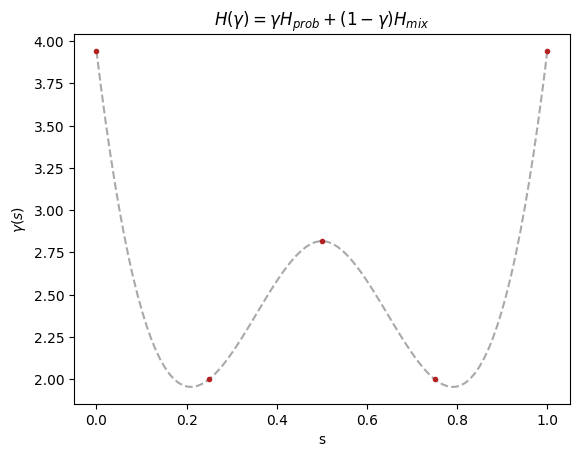

In [8]:
loss_opt = loss_ra(x1_opt, x2_opt, x3_opt)
print('Optimized spectral gap = ', -loss_opt.round(4))

schedule_opt = get_symmetric_schedule([x1_opt, x2_opt, x3_opt])
plot_schedule(schedule_opt, get_schedule_interpolator(schedule_opt, 'cubic')) 

In [9]:
ra_exp = {'n': n,
          'T': T,
          'interpolator_kind': interpolator_kind,
          't_max': t_max,
          'schedule_opt': schedule_opt.tolist(),
          'loss_opt': loss_opt,
          'first_optimizer': 'BO',
          'second_optimizer': 'None',
          'n_random_models': 1
          }

save_in_json(ra_exp, f'n{n}_{interpolator_kind}_BO.json')